# Emergencias médicas

En México la cantidad de hospitales con las que cuenta el estado de Ciudad de México han ido quedando cada vez con menor capacidad de atención atente el crecimiento demográfico en esta zona de país. Además de eso, no solo la capacidad ha sido revasada, si no también los insumos cada vez son más escasos ante el crecimiento de la ciudad.

Para conocer un poco sobre la cantidad de urgencias que pueden presentarse en diverentes hospitales de la CDMX se ha descargando un registro de datos públicos:
Urgencias Datos Abiertos, Registro de urgencias 2018,2022, Dirección General de Información en Salud. 
Con registros actualiados hasta el 2023-01-02.
Con una licencia libre uso MX

Con la finalidad de entender el tipo urgencias principales que se tienen en la ciudad, cantidad de caso en periodos de tiempo, si existen épocas del año donde los hospitales han mostrado mayor ocupación y sobre todo conocer que tipos de emergencias son aquellas las más comunes para ayudar al gobierno a conocer el insumo básico de todos los hospitales para poder atender las emergencia de manera digna y segura según los registros obtenidos.

## Código CIE-10
Es la Clasificación Estadística Internacional de Enfermedades y Problemas Relacionados con la Salud

Para este análisis usaremos de referencia la edición 10, para entender las enfermedades con mayor frecuencia como diagnóstico princpial de todos los ciudadanos que acuidieron al servicio de urgencias.

Es importante entender que nuestro código cuenta con todas las siguientes clasificaciones de enfermedades, por lo que enlistar todas no será posible. Pero si buscaremos dentro de este código para nombrar las patologías más comunes segín vyaan apareciendo en el análisis de datos.

*Patologías y su clasificación dentro del Codigo CIE-10*

- Ciertas enfermedades infecciosas y parasitarias 
- Tumore
- Enfermedades de la sangre y de los órganos hematopoyéticos, y ciertos trastornos  que afectan el mecanismo de la inmunofisiencia
- Enfermedades endocrinas, nutricionales y metabó
-  Trastornos mentales y del comportamiento
- Enfermedades del sistema nervioso
- Enfermedades del ojo 
- Enfermedades del oído y de la apófisis
- Enfermedades del sistema circulatorio
- Enfermedades del sistema respiratorio
- Enfermedades del sistema digestivo
- Enfermedades de la piel y del tejido subcutaneo
- Enfermedades del sistema osteomuscula  y del tejiso conjuntivo
- Enfermedades del sistema urinario 
- Embarazo, po-  y puerperio 
- Ciertas afecciones originadas en el oido perinatal
- Malformaciones congénitas, deformidades y anomalias cromosómicas
- Traumatismos, envenen mientos y algunas otras consecuencias de causas externas
- Causas externas de i- lidad y de mortalidad

# Descripción del data

*Para este data se nos ha sido otorgado la siguiente información:*

Identificación 

Pistas - Hospital

fecha_st - Fecha

HORARIO ESTANCIA - Tiempo de estancia en el hospital

Edad - Edad del paciente

Sexo (Maculino o Femenino)

AFECPRINA (Causa principal según el código CIE-10)

Descripción (Descripcion de la causa principal)

norma_del_toem (tiempo normalizado (inicio del tratamiento/atención)

latitud (Latitud del condado de residencia del paciente)

largo (longitud del condado de residencia del paciente)

alt (Altitud del condado de residencia del paciente)

año - año

día del año

pregunta - identificación de ubicación

longitud del día - Duración de la luz solar en la ubicación

longituddeldíad03 - Duración de la luz solar en la ubicación

sf_msd - flujo solar en la ubicación3.7



# Objetivo del estudio

Conocer la cantidad de urgencias registradas en cdmx en hospitales y cuales son los casos más comunes que se han presnetado en los último años para un registro epidemiológico, así como rangos de edad que más usan este servicio de emergencia y que sexo es más recurrente, para entender si los servicios de salud son suficinetes, si estamos presentando saturación en urgencias y contar con los insumos básicos para las patologías para comunes dentro de la capital del país.

# Descarga de los datos

In [1]:
#cargar las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#cargar los archivos
data=pd.read_csv("/Users/DELL/Downloads/archive/urgenciascomplete.csv")

In [3]:
#manda a llamar info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31221153 entries, 0 to 31221152
Data columns (total 23 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ID              int64  
 1   CLUES           object 
 2   date_st         object 
 3   HORASESTANCIA   float64
 4   age             float64
 5   SEXO            int64  
 6   AFECPRIN        object 
 7   desc            object 
 8   toem_norm       float64
 9   lat             float64
 10  long            float64
 11  alt             float64
 12  year            int64  
 13  dayofyear       int64  
 14  qry             object 
 15  lengthofday     float64
 16  lengthofdayd03  float64
 17  lengthofdayd06  float64
 18  lengthofdayd10  float64
 19  sf_msd          float64
 20  sf_msd03        float64
 21  sf_msd06        float64
 22  sf_msd10        float64
dtypes: float64(14), int64(4), object(5)
memory usage: 5.4+ GB


In [4]:
data.head()

,ID,CLUES,date_st,HORASESTANCIA,age,SEXO,AFECPRIN,desc,toem_norm,lat,...,dayofyear,qry,lengthofday,lengthofdayd03,lengthofdayd06,lengthofdayd10,sf_msd,sf_msd03,sf_msd06,sf_msd10
0,645446,PLSSA000834,2018-01-30 00:00:00,0.0,47.0,2,N61X,trastornos inflamatorios de la mama,0.184028,19.604561,...,30,lat==19.60456058333333 & long==-97.59160372916666,11.991913,8.710359,5.328676,4.341199,2.128629,1.207075,-0.994482,-3.261318
1,645447,PLSSA000834,2018-01-31 00:00:00,0.0,15.0,1,J00X,rinofaringitis aguda [resfriado común],0.322917,19.720198,...,31,lat==19.7201975 & long==-97.65953396,11.998949,8.738230,5.395846,4.460408,2.153989,1.480931,1.223959,11.246674
2,645448,PLSSA000834,2018-02-02 00:00:00,0.0,1.0,2,J00X,rinofaringitis aguda [resfriado común],0.347222,19.604561,...,33,lat==19.60456058333333 & long==-97.59160372916666,12.028825,8.807361,5.514742,4.601245,2.322987,2.482803,6.361780,32.030594
3,645449,PLSSA000834,2018-02-03 00:00:00,0.0,2.0,2,J029,"faringitis aguda, no especificada",0.479167,19.550212,...,34,lat==19.55021194117647 & long==-97.65607535294116,12.043831,8.841720,5.573290,4.669570,2.240972,1.651749,-0.965816,-26.909241
4,645450,PLSSA000834,2018-02-04 00:00:00,0.0,39.0,2,N72X,enfermedad inflamatoria del cuello uterino,0.475694,19.604561,...,35,lat==19.60456058333333 & long==-97.59160372916666,12.054579,8.872825,5.637245,4.767052,2.153668,1.103810,-3.598940,-31.882842


# Preparación y limpieza de los datos

In [5]:
#buscar filas duplicadas
print(data.duplicated().sum())

0


In [6]:
#buscar valores ausentes
print(data.isna().sum())

ID                0
CLUES             0
date_st           0
HORASESTANCIA     0
age               0
SEXO              0
AFECPRIN          0
desc              0
toem_norm         0
lat               0
long              0
alt               0
year              0
dayofyear         0
qry               0
lengthofday       0
lengthofdayd03    0
lengthofdayd06    0
lengthofdayd10    0
sf_msd            0
sf_msd03          0
sf_msd06          0
sf_msd10          0
dtype: int64


In [7]:
#Eliminar las columnas que no sean necesarias para nuestro análisis
data_redusido=data.drop(["lat","long","alt","qry", "lengthofday", "lengthofdayd03", "lengthofdayd06", "lengthofdayd10","sf_msd","sf_msd03", "sf_msd06", "sf_msd10"], axis=1)

In [8]:
#mostrar data con solo las columnas seleccionadas
data_redusido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31221153 entries, 0 to 31221152
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ID             int64  
 1   CLUES          object 
 2   date_st        object 
 3   HORASESTANCIA  float64
 4   age            float64
 5   SEXO           int64  
 6   AFECPRIN       object 
 7   desc           object 
 8   toem_norm      float64
 9   year           int64  
 10  dayofyear      int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 2.6+ GB


In [9]:
#Cambiar nombre a las columnas
data_redusido= data_redusido.rename(columns={"ID": "id", "CLUES": "id_hospital", "date_st":"fecha", "HORASESTANCIA":"tiempo_de_estancia", "age":"edad", "SEXO":"sexo", "AFECPRIN":"dx_inicial", "desc": "sintomas", "toem_norm": "tiempo_tx", "year": "año", "dayofyear":"dia_del_año"})

In [10]:
data_redusido.columns

Index(['id', 'id_hospital', 'fecha', 'tiempo_de_estancia', 'edad', 'sexo',
       'dx_inicial', 'sintomas', 'tiempo_tx', 'año', 'dia_del_año'],
      dtype='object')

Empezando con el ánalisis de datos podemos observar que este data viene sin datos duplicados o ausentes, lo que facilita su manejo.

Enfocandonos en la finalidad del estudio ya mencionados se decidio eliminar las columnas con informacion sobre latitud y altitud de los pacientes acudidos, a que la cercania de los hogares o como los pacientes pueden presentar dierentes patologías según su lugar de residencia. Eto también con la finalidad de crear un data más pequeño y fácil de manejar, reduciendo la cantidad de información necesaria.

# Análisis exploratorio de datos 

In [11]:
#encontrar el numero de hospitales
hospitales= data_redusido.groupby('id_hospital').agg({"id_hospital":"nunique"}).count()
hospitales

id_hospital    969
dtype: int64

In [12]:
#numero de casos por año
casos_por_enfermedad_y_año = data_redusido.groupby(['año', 'dx_inicial']).size().reset_index(name='num_casos')

# Ordenar para mayor claridad (opcional)
casos_por_enfermedad_y_año = casos_por_enfermedad_y_año.sort_values(by=['año', 'num_casos'], ascending=[True, False])

# Mostrar el resultado
print(casos_por_enfermedad_y_año)

        año dx_inicial  num_casos
439    2017       Z349         38
124    2017       J00X         34
103    2017       I10X         32
127    2017       J029         32
290    2017       R104         30
...     ...        ...        ...
42122  2022       Z943          1
42124  2022       Z945          1
42130  2022       Z954          1
42133  2022       Z959          1
42143  2022       Z972          1

[42154 rows x 3 columns]


In [14]:
# Agrupar por año y contar número de casos
casos_por_año = data_redusido['año'].value_counts().reset_index()
casos_por_año.columns = ['año', 'num_casos']
casos_por_año = casos_por_año.sort_values(by='año')  # Asegura el orden cronológico
casos_por_año

,año,num_casos
5,2017,1315
1,2018,7563380
0,2019,8024723
4,2020,4945709
3,2021,5067793
2,2022,5618233


C:\Users\DELL\AppData\Local\Temp\ipykernel_10732\4286133876.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=casos_por_año, x='año', y='num_casos', palette='crest')


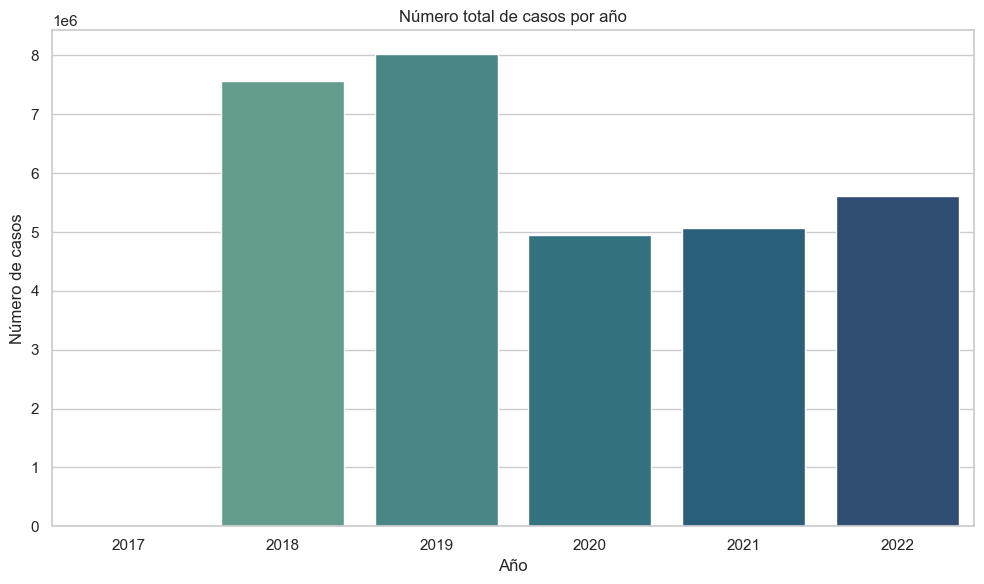

In [15]:
# Estilo visual
sns.set(style="whitegrid")

# Crear gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=casos_por_año, x='año', y='num_casos', palette='crest')

# Etiquetas y título
plt.title('Número total de casos por año')
plt.xlabel('Año')
plt.ylabel('Número de casos')
plt.tight_layout()

# Mostrar gráfico
plt.show()

### Existe una relación entre el número de casos por año y el crecimiento demográfico registrado en cdmx en esos años?

El crecimiento de la población en la Ciudad de México (CDMX) entre 2017 y 2022 no ha sido constante y ha fluctuado, aunque generalmente ha mantenido un ritmo de crecimiento moderado. 

*Datos relevantes:* 

Tasa de crecimiento: En general, la tasa de crecimiento poblacional en la CDMX se ha mantenido en alrededor del 1.1%. 

En el censo de 2020: INEGI reportó una población de 9,209,944 habitantes en la CDMX. 

En 2020, la población de la CDMX creció un 4.05% en comparación con 2010. 

In [16]:
#numero de casos por enfermedad por año
casos_por_enfermedad = data_redusido['dx_inicial'].value_counts().reset_index()
casos_por_enfermedad.columns = ['dx_inicial', 'num_casos']

# Ordenar de mayor a menor
casos_por_enfermedad = casos_por_enfermedad.sort_values(by='num_casos', ascending=False)

# Mostrar el resultado
print(casos_por_enfermedad)

     dx_inicial  num_casos
0          Z349    2029210
1          Z348     955186
2          J029     883878
3          A099     700156
4          J00X     690914
...         ...        ...
9018       Q770          1
9019       Z626          1
9020       L415          1
9021       B052          1
9142       R855          1

[9143 rows x 2 columns]


C:\Users\DELL\AppData\Local\Temp\ipykernel_10732\2655733251.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_enfermedades, x='num_casos', y='dx_inicial', palette='viridis')


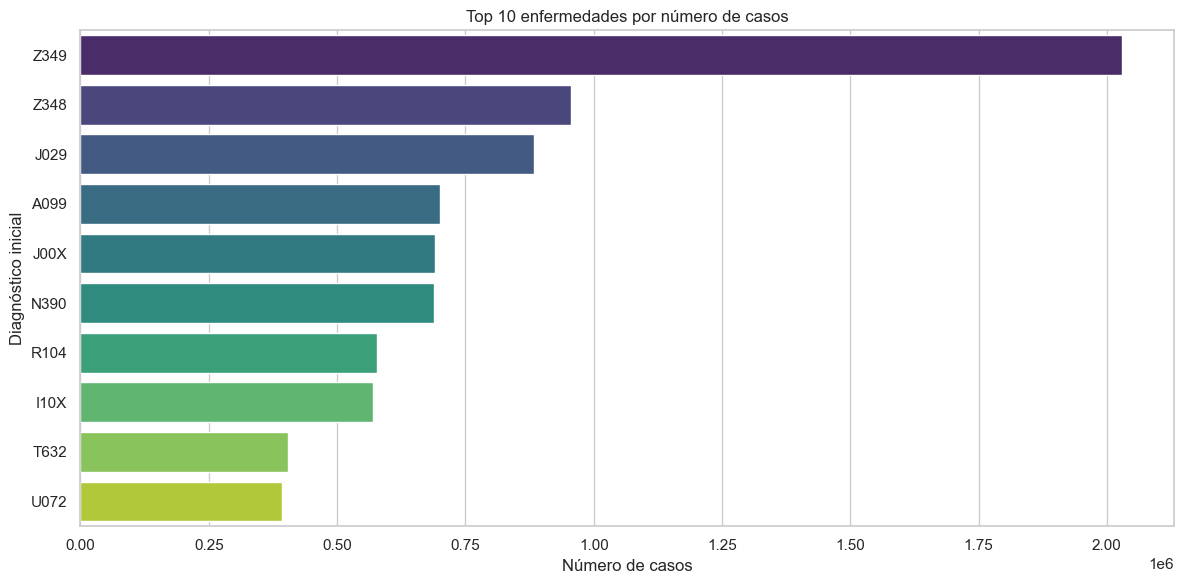

In [17]:
# Mostrar solo las 10 enfermedades más comunes
top_enfermedades = casos_por_enfermedad.head(10)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=top_enfermedades, x='num_casos', y='dx_inicial', palette='viridis')

# Etiquetas y título
plt.title('Top 10 enfermedades por número de casos')
plt.xlabel('Número de casos')
plt.ylabel('Diagnóstico inicial')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Para entender el gráfico se nombraran según el código cuales son las urgencias más recurrentes en CDMX:

El código Z34.9 de la CIE-10 se refiere a la supervisión de un embarazo normal.
El código Z34.8 de la CIE-10 se refiere a la supervisión de embarazos normales que no presentan complicaciones.
El código J02.9 de la CIE-10 es el código para faringitis aguda no especificada
El código A09.9 de la CIE-10 se refiere a la gastroenteritis y colitis de origen no especificado
El código CIE-10 J00X se refiere a la rinofaringitis aguda, también conocida como resfriado común. 
El código N39.0 de la CIE-10 corresponde a una infección del tracto urinario (ITU) sin especificar el sitio
El código CIE-10 R104 se refiere a otros dolores abdominales y los no especificados
El código I10X de la CIE-10 corresponde a la hipertensión esencial (primaria)
T632 VENENO DE ESCORPION
U072 COVID-19 está documentado como asociado con una infección respiratoria inferior, no especificada de otra manera (NEOM), o una infección respiratoria aguda, NEOM, deben asignarse los códigos U07. 1 y J22 Infección aguda del tracto respiratorio inferior, no especificada.

C:\Users\DELL\AppData\Local\Temp\ipykernel_10732\875927740.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=casos_por_sexo, x='sexo', y='num_casos', palette='Set2')


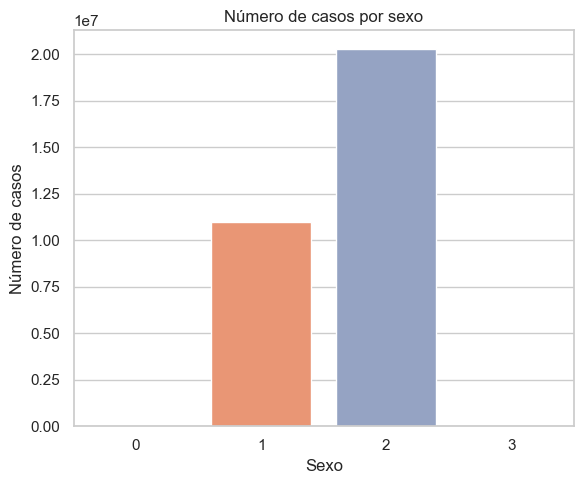

In [18]:
# Contar número de casos por sexo
casos_por_sexo = data_redusido['sexo'].value_counts().reset_index()
casos_por_sexo.columns = ['sexo', 'num_casos']

# Estilo visual
sns.set(style="whitegrid")

# Crear gráfico
plt.figure(figsize=(6, 5))
sns.barplot(data=casos_por_sexo, x='sexo', y='num_casos', palette='Set2')

# Etiquetas y título
plt.title('Número de casos por sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de casos')
plt.tight_layout()

# Mostrar gráfico
plt.show()

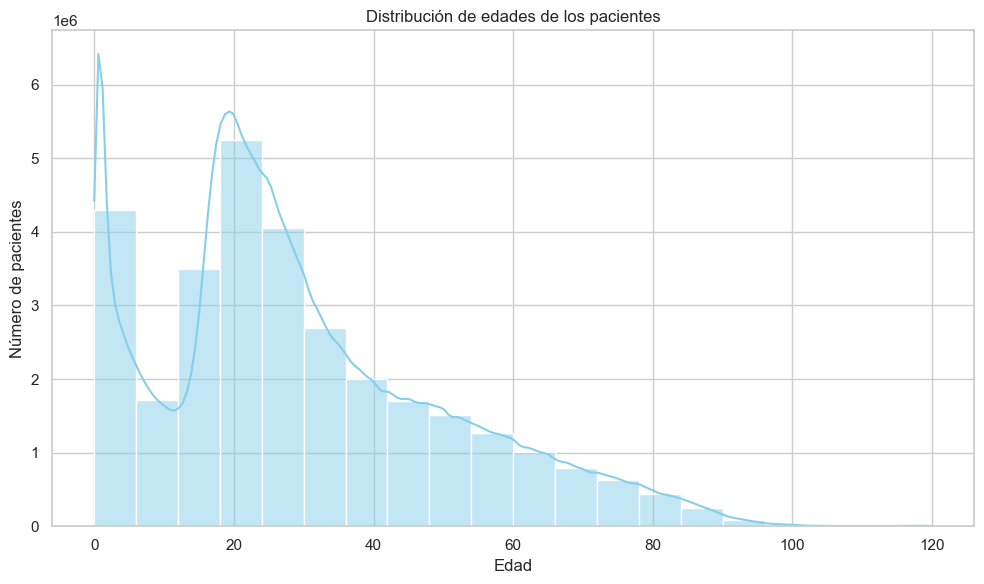

In [19]:
#casos por rangos de edad

# Estilo del gráfico
sns.set(style="whitegrid")

# Crear histograma
plt.figure(figsize=(10, 6))
sns.histplot(data=data_redusido, x='edad', bins=20, kde=True, color='skyblue')

# Etiquetas y título
plt.title('Distribución de edades de los pacientes')
plt.xlabel('Edad')
plt.ylabel('Número de pacientes')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [20]:
#promedio de tiempo de estancia
promedio_estancia= data_redusido["tiempo_de_estancia"].mean()
promedio_estancia

2.7145376085245796

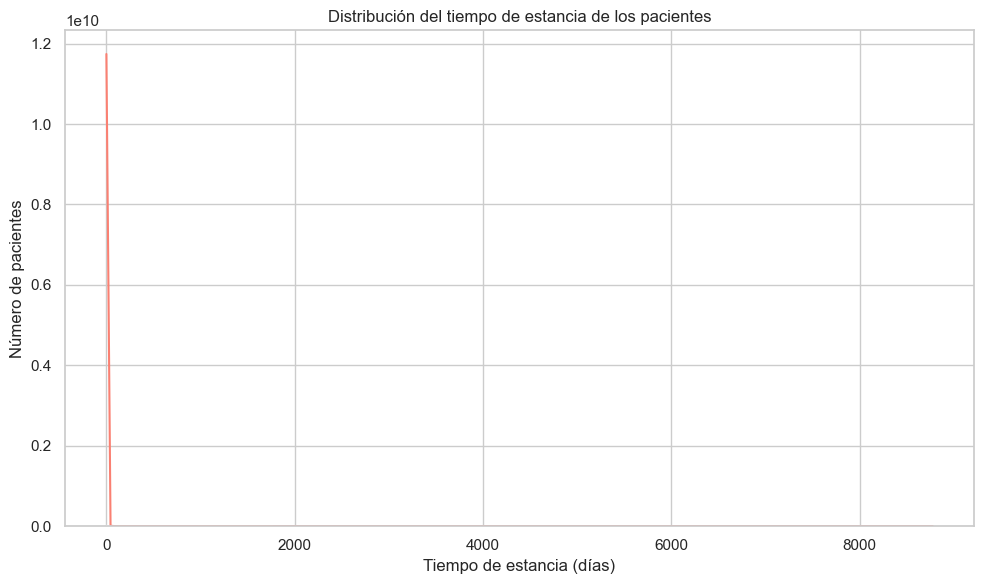

In [21]:
#rangos de tiempo de estancia en el hospital
# Estilo del gráfico
sns.set(style="whitegrid")

# Crear histograma
plt.figure(figsize=(10, 6))
sns.histplot(data=data_redusido, x='tiempo_de_estancia', bins=5, kde=True, color='salmon')

# Etiquetas y título
plt.title('Distribución del tiempo de estancia de los pacientes')
plt.xlabel('Tiempo de estancia (días)')
plt.ylabel('Número de pacientes')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [22]:
#promedio de tiempo de tx
tiempo_ser_atendido= data_redusido["tiempo_tx"].mean()
tiempo_ser_atendido

0.42641647753385603

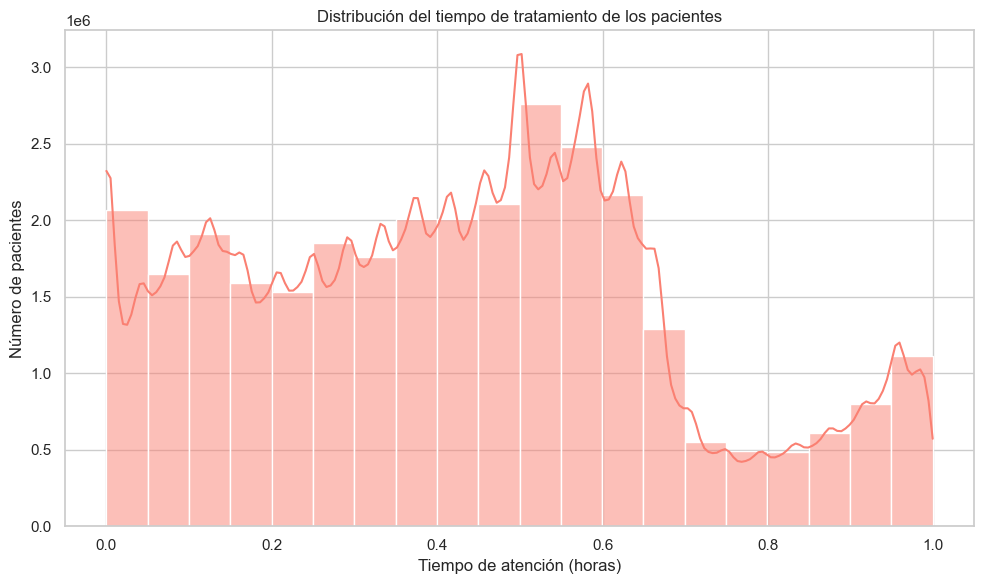

In [23]:
#rangos de tiempo de tratamiento en el hospital
# Estilo del gráfico
sns.set(style="whitegrid")

# Crear histograma
plt.figure(figsize=(10, 6))
sns.histplot(data=data_redusido, x='tiempo_tx', bins=20, kde=True, color='salmon')

# Etiquetas y título
plt.title('Distribución del tiempo de tratamiento de los pacientes')
plt.xlabel('Tiempo de atención (horas)')
plt.ylabel('Número de pacientes')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Conclusiones

Conocer las urgencia registradas de la CDMX ha nivel hospitalario nos abre el panorama para entender donde podemos enfocar los recursos para insrumentos  capacitación del personal.

Aunque no podemos generalizar, e simportante conocer como funcionan el sistema para poder mejorarlo.

- En total tenemos un registro de 969 hospitales, en el data, aunque se desconoce si son del sector público y/o privado.

- A partir de la llegada del COVID a nuestro país en 2020, la atencion a casos "fuera de covid" se vio reducida en un 30%, pero al estabilizar los casos, los hospitales han tenido un aumento en los casos entre un 20 a 25%.

- Calculamos que para el año 2022, en promedio se tenian más del 5000 casos de urgencias por hospital, lo que sería un promedio de 14 casos al día nuevos por hospital.

- Las urgencias más comunes registradas son prncipalmente por embarazos ( con un 55% más de los casos), faringuitis, casos de gastritis y colitis, resfriados, infeccion en vias urinarias, dolor abdominal, casos de hipertensión, mordeduras con veneno y casos de COVID.

- un 55% de los casos son del género femenino (sexo 2)

- El 70% de los casos eson en un rango de 20 a 40 años.

- <10% de los casos son casos de mayores de 50 años en adelante.

- El tiempo promedio de tiempo para ser atendido es de 40 minutos.

- Donde el 95% de la estancia hospitalaria por urgencia es menor de 2 dias.